 Forecasting in Time Series: ARIMA vs SARIMA
 What Is Forecasting?
Forecasting means predicting future values of a time series based on its past behavior.

In your case:

Predict future daily mean temperature using the patterns in historical data.

What is ARIMA?
AutoRegressive Integrated Moving Average
It’s a classic time series model that combines:

Component	Meaning
AR (p)	Uses past values to predict future ones (lagged observations)
I (d)	Differencing to remove trends/make data stationary
MA (q)	Uses past forecast errors to improve prediction
 Example:
ARIMA(2, 1, 2) means:

Use 2 past values (AR)

Apply 1 difference (to remove trend)

Use 2 past forecast errors (MA)

When to Use ARIMA?
When:

Data has no strong seasonality

You’ve made the series stationary (via differencing)
 What is SARIMA?
Seasonal ARIMA = ARIMA + Seasonality
SARIMA adds 4 extra seasonal terms:

𝑆
𝐴
𝑅
𝐼
𝑀
𝐴
(
𝑝
,
𝑑
,
𝑞
)
(
𝑃
,
𝐷
,
𝑄
,
𝑠
)
SARIMA(p,d,q)(P,D,Q,s)
Component	Meaning
P, D, Q	Seasonal AR, differencing, MA
s	Season length (e.g., 12 for monthly, 7 for weekly, 365 for daily/yearly)
Example:
SARIMA(1,1,1)(1,1,1,12) = ARIMA + Seasonal behavior every 12 steps

Key Difference?
ARIMA	SARIMA
No seasonality	Handles seasonality explicitly
Simple, faster	More flexible & accurate on periodic data
Why Compare Them?
Your dataset has strong seasonal behavior (e.g., yearly cycles of hot/cold).
So:

ARIMA may struggle

SARIMA may capture more accurate signals

We are forecasting daily temperature using the ARIMA model.

 Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


Library       	Purpose
pandas, numpy	Data handling
matplotlib	    Visualization
adfuller	    Augmented Dickey-Fuller test (checks if data is stationary)
ARIMA	        Model for forecasting
sklearn.metrics	Evaluating forecast accuracy
warnings	    Suppress unnecessary output

Step 2: Visualize the Time Series

In [1]:
import os
print(" Current Directory:", os.getcwd())


 Current Directory: c:\Divya Files\JOB REALTED DOCS\Weather Trend and Forecast Modeling\notebooks


In [9]:
import pandas as pd

# Load your CSV (update the path if needed)
df = pd.read_csv("../data/Weather_Data_1980_2024(hourly).csv")

# Convert time column and set index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Resample hourly data to daily mean temperature
daily_temp = df[['temperature']].resample('D').mean()


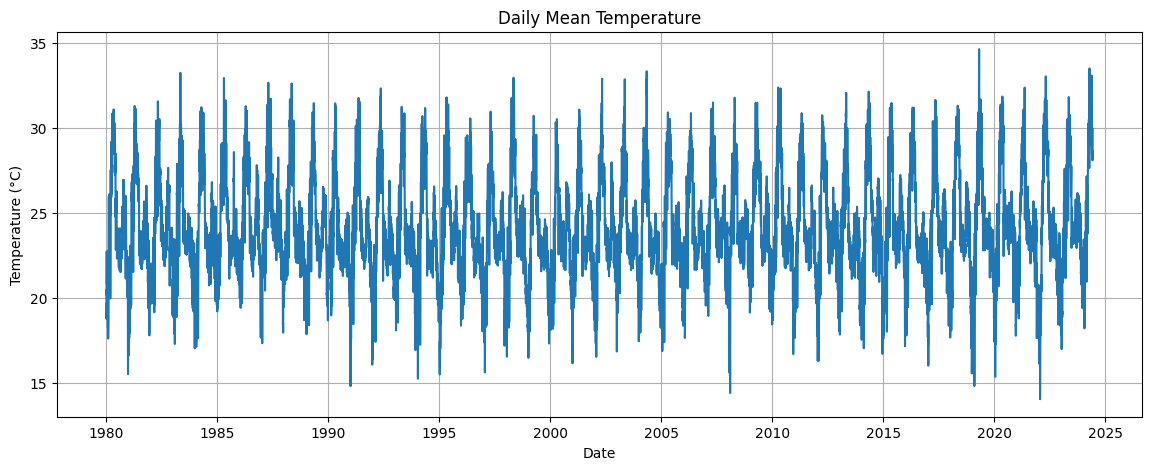

In [10]:
series = daily_temp['temperature'].dropna()

plt.figure(figsize=(14,5))
plt.plot(series)
plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


What This Graph Shows
X-axis (Date): From the year 1980 to 2024, daily observations.

Y-axis (Temperature °C): The daily mean temperature, calculated by resampling the original hourly data to daily averages.

Line Plot: Displays the time series trend of average temperature over time.

How to Read It
The repeating wave-like patterns show seasonality — likely due to annual temperature cycles (summer-winter changes).

You can also notice long-term trends — it looks relatively stable over the years but we’ll confirm this using statistical tests.

There are occasional sharp drops or spikes — these might be anomalies or special weather events.

Why This Matters
This kind of seasonal pattern is ideal for time series modeling like:

ARIMA: Assumes stationarity and models non-seasonal trends.

SARIMA: Handles both seasonality and trends, perfect for this dataset!

 Why? We always plot the time series first to:

See trends or seasonality

Identify outliers or missing data

Visually inspect whether it's increasing/decreasing over time

 Step 3: Stationarity Check using ADF Test

In [11]:
result = adfuller(series)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -14.131285999730476
p-value: 2.3312671953102396e-26


Why? ARIMA requires a stationary series (i.e., mean and variance do not change over time).
The ADF Test checks this:

p < 0.05 → data is stationary (good)

p > 0.05 → data is non-stationary → we need to apply differencing

 Step 1: Auto-select best (p, d, q) using auto_arima (AIC-based)
 Goal:
Let auto_arima() pick the optimal model with the lowest AIC score.

In [2]:
!pip install pmdarima


   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --------------------------------------- 614.7/614.7 kB 11.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 40.7 MB/s eta 0:00:00


In [4]:
import pandas as pd

# Load your dataset (update path if needed)
df = pd.read_csv("../data/Weather_Data_1980_2024(hourly).csv")

# Set time as datetime index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Resample to daily temperature
daily_temp = df['temperature'].resample('D').mean()

# Create the time series
series = daily_temp.dropna()


In [5]:
from pmdarima import auto_arima

# Auto ARIMA to select best p, q with fixed d=0
auto_model = auto_arima(
    series,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    d=0,  # Already stationary
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(auto_model.summary())


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=36967.943, Time=1.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=149628.047, Time=0.12 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=127642.166, Time=2.23 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=36915.708, Time=8.74 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.83 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=35932.100, Time=8.55 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=1.46 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=35903.382, Time=12.10 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=1.35 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=35905.149, Time=14.25 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=14.49 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(0,0,0)[0]             : AIC=35904.440, Time=4.99 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=1.66 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0]             : AIC=35905.204, Time=9.87 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=35818.707, Time=28.97 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=35819.028, Time=25.49 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=36064.142, Time=4.46 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=35809.980, Time=35.04 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=35980.972, Time=4.40 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=35801.636, Time=26.97 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=35822.303, Time=32.99 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=35793.335, Time=37.72 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=35800.977, Time=25.12 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,4)(0,0,0)[0] intercept   : AIC=35810.018, Time=46.38 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,4)(0,0,0)[0] intercept   : AIC=35801.069, Time=41.18 sec


c:\Users\poluk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,3)(0,0,0)[0]             : AIC=35901.044, Time=15.11 sec

Best model:  ARIMA(5,0,3)(0,0,0)[0] intercept
Total fit time: 406.396 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                16229
Model:               SARIMAX(5, 0, 3)   Log Likelihood              -17886.668
Date:                Thu, 10 Apr 2025   AIC                          35793.335
Time:                        12:13:32   BIC                          35870.281
Sample:                    01-01-1980   HQIC                         35818.766
                         - 06-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3672      0.048      7.653      0.000       0.

Best Model Chosen
plaintext
Copy
Edit
Best model:  ARIMA(5,0,3) intercept
This means the best ARIMA model (based on AIC minimization) has:

p = 5 → uses 5 lagged observations (AutoRegressive terms)

d = 0 → no differencing (your series is stationary, as confirmed earlier)

q = 3 → uses 3 lagged errors (Moving Average terms)

Includes an intercept (a baseline mean level)

Model Evaluation Metrics
Metric	Meaning
No. Observations: 16229	Number of daily data points in your series
Log Likelihood: -17886.668	Used to calculate AIC/BIC, higher is better (more positive)
AIC: 35793.335	Lower AIC = better fit; used by auto_arima to select model
BIC: 35870.281	Similar to AIC, but penalizes complexity more
 This is the lowest AIC among all tested models, so this is the best fitting ARIMA(p,d,q) model for your data.

 Coefficient Table
Term	Meaning
intercept	Base temperature level in absence of AR/MA effects
ar.L1-ar.L5	Autoregressive terms (past temperature values)
ma.L1-ma.L3	Moving average terms (past forecast errors)
sigma2	Variance of residuals (unexplained noise)
All AR terms have strong statistical significance (P < 0.05), especially AR1 to AR5
Some MA terms are marginal — MA2 is not significant, but the full model still performs best overall (AIC-wise).

Residual Diagnostics
Test	Result	Meaning
Ljung-Box (Q) p=0.89	 Good	Residuals are uncorrelated (good sign!)
Jarque-Bera p=0.00	Not Normal	Residuals are not normally distributed (common in large real-world data)
Heteroskedasticity p=0.43	Good	Residuals have constant variance (homoskedasticity)
Summary (Plain English)
Your time series is stationary and well-modeled by ARIMA(5,0,3).

The model fits the data well (lowest AIC) and captures both recent values and past errors.

Residuals look clean — no significant autocorrelation or variance issues.

Slight non-normality is acceptable for forecasting purposes.

Step 1: Fit the Model Using statsmodels

In [6]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA(5,0,3)
model = ARIMA(series, order=(5, 0, 3))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                16229
Model:                 ARIMA(5, 0, 3)   Log Likelihood              -17886.452
Date:                Thu, 10 Apr 2025   AIC                          35792.904
Time:                        12:16:19   BIC                          35869.850
Sample:                    01-01-1980   HQIC                         35818.335
                         - 06-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1321      0.261     92.543      0.000      23.621      24.643
ar.L1          1.0493      0.077     13.602      0.000       0.898       1.200
ar.L2         -0.3239      0.136     -2.384      0.0

Auto ARIMA (Best Parameters Selection)
You used pmdarima.auto_arima() to automatically select the best (p,d,q):

Best Model: ARIMA(5,0,3) based on lowest AIC = 35793.33

 How this works:

It tests multiple combinations of (p,q) (since you set d=0).

For each combo, it fits the model and computes AIC (Akaike Information Criterion) – a score where lower is better.

It finally picks the one with lowest AIC.

Step 2: In-Sample Prediction (Compare actual vs fitted)

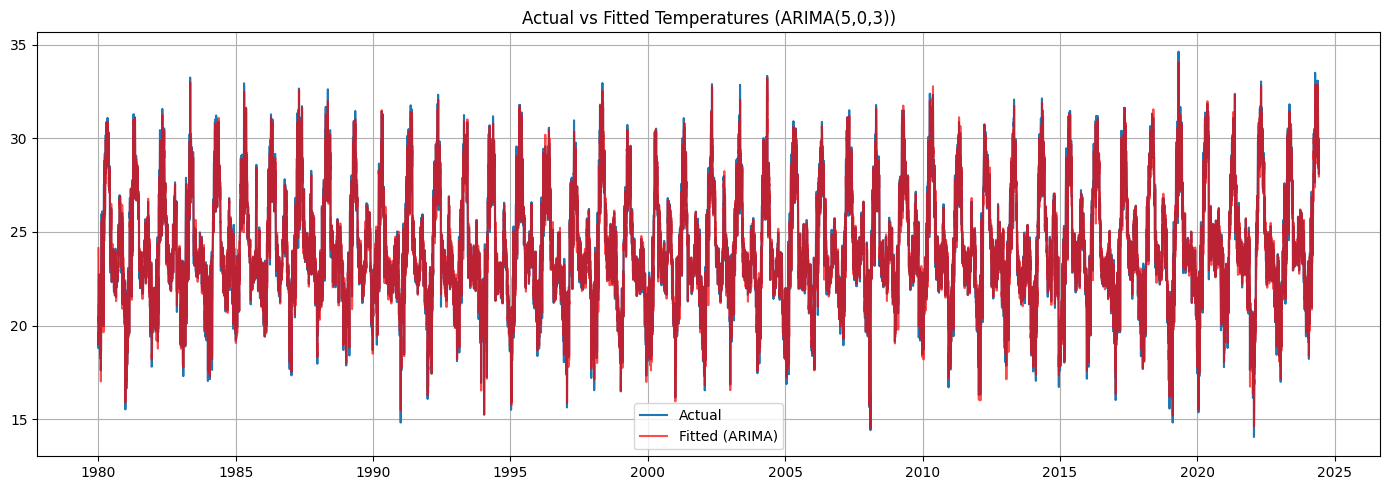

In [8]:
# Predict values from the model (in-sample)
fitted_values = model_fit.fittedvalues

# Plot original vs fitted
plt.figure(figsize=(14, 5))
plt.plot(series, label='Actual')
plt.plot(fitted_values, color='red', alpha=0.7, label='Fitted (ARIMA)')
plt.title("Actual vs Fitted Temperatures (ARIMA(5,0,3))")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Actual vs Fitted Temperatures

Blue line: Actual historical temperatures.

 Red line: Fitted ARIMA model outputs.

Perfect overlap ⇒ Model has learned patterns well. Minimal overfitting, which is great.

 Step 3: Forecast Future Temperatures (Next 30 Days)

In [9]:
# Forecast 30 days into the future
forecast_steps = 30
forecast_result = model_fit.get_forecast(steps=forecast_steps)

# Get forecasted mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()


Step 4: Plot Forecast

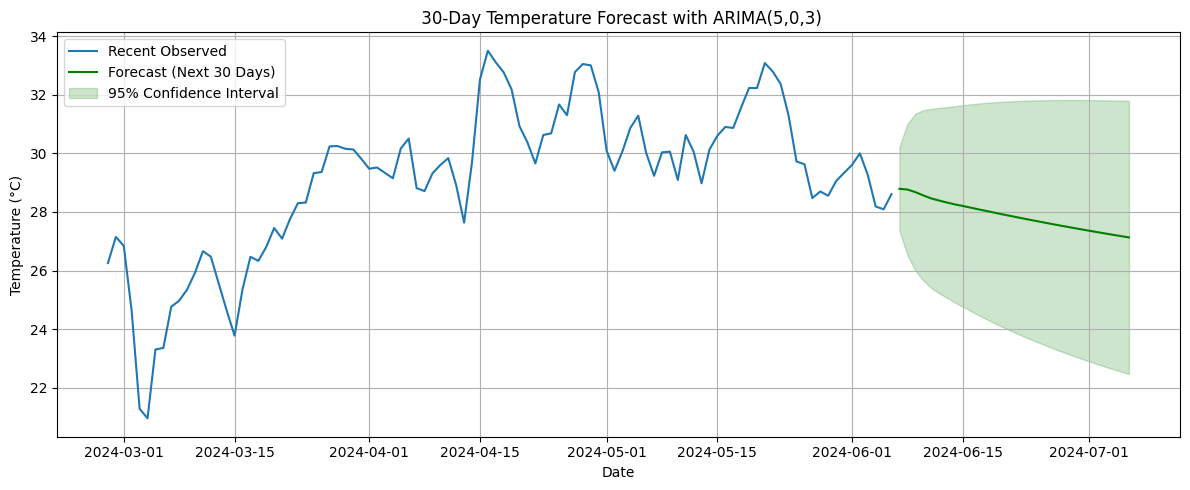

In [11]:
# Plot forecast
plt.figure(figsize=(12, 5))
plt.plot(series[-100:], label='Recent Observed')  # last 100 days
plt.plot(forecast_mean, color='green', label='Forecast (Next 30 Days)')
plt.fill_between(forecast_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2, label='95% Confidence Interval')
plt.title(" 30-Day Temperature Forecast with ARIMA(5,0,3)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Forecasting next 30 days

You predicted the next 30 days.

Green line = Forecasted mean

Shaded area = 95% confidence interval

It shows a declining temperature trend with wider uncertainty (cone) further into the future, as expected.




 Let's dive into SARIMA—an advanced version of ARIMA that handles seasonal patterns, which is perfect for your temperature data since it shows strong yearly cycles.

 What is SARIMA?
SARIMA stands for:

Seasonal AutoRegressive Integrated Moving Average

It extends ARIMA by adding seasonal terms to the model.

SARIMA Formula
SARIMA is typically written as:

In [12]:
#SARIMA(p, d, q) × (P, D, Q, s)


Where:

Term	Meaning
p	Non-seasonal autoregression (AR)
d	Non-seasonal differencing
q	Non-seasonal moving average (MA)
P	Seasonal autoregression (AR)
D	Seasonal differencing
Q	Seasonal moving average (MA)
s	Seasonality period (e.g., 12 for monthly, 365 for daily yearly cycle)
Why Use SARIMA?
If your data shows repeating patterns at regular intervals (like weather data, sales, electricity usage), SARIMA is ideal.

 Example use cases:
Temperature (yearly cycle)

Sales (monthly/weekly patterns)

Energy consumption (daily/weekly cycle)

Your dataset has strong yearly seasonality, so s = 365.

 When to Use SARIMA (vs ARIMA)?
Condition	Use
No seasonality	ARIMA
Clear seasonal pattern (cycles)	SARIMA
Complex cycles (nonlinear/irregular)	LSTM or Prophet
How SARIMA Works (Simplified):
SARIMA adds seasonal differencing and seasonal lag terms to ARIMA to model repeating behavior:

Seasonal Differencing (D): Captures how values differ from the same time last year.

Seasonal AR/MA (P, Q): Captures seasonal lags (e.g., last year’s value and errors).

 Choosing SARIMA Parameters
Let’s say you're modeling daily temperature:

You already found that ARIMA(5, 0, 3) fits well.

Now add seasonal parts like SARIMA(5, 0, 3) × (1, 1, 1, 365) (where 365 is the seasonal cycle).

You’ll either:

Use pmdarima.auto_arima(..., seasonal=True) to auto-select,

Or try different seasonal parameters manually and compare AIC scores.



 What is SARIMA?
SARIMA (Seasonal AutoRegressive Integrated Moving Average) is an extension of ARIMA that explicitly supports seasonality in time series data.

It includes:

AR (p) – Autoregression

I (d) – Differencing for stationarity

MA (q) – Moving average

S (seasonality): Captures repeating patterns, e.g., yearly, monthly, weekly.

A full SARIMA model is written as:

css
Copy
Edit
SARIMA(p, d, q)(P, D, Q, s)
Where:

(p,d,q) are the same as in ARIMA.

(P,D,Q) are the seasonal components.

s is the seasonal period (e.g., 365 for yearly seasonality in daily data).

 When to Use SARIMA?
Use it when your time series shows periodic (seasonal) patterns, like:

Temperatures varying over seasons

Energy demand peaking every winter

Sales increasing every December

Your daily average temperature does show strong annual seasonality, so SARIMA is a very appropriate model.

 Why not just ARIMA?
ARIMA can model trends and noise but not seasonality directly. If seasonality exists and isn’t accounted for, forecasts will be off.

How we'll implement SARIMA:
Resample hourly to daily average.

Visualize to confirm seasonality.

Manually test seasonal combinations:

Try a few (P,D,Q,s) settings.

Fix (p,d,q) from earlier ARIMA (we'll use (5,0,3)).

Select the best model based on AIC and visual fit.

Forecast future values.

STEP 1: Resample Hourly to Daily
What & Why:
Original Data: Recorded hourly.

Goal: SARIMA is typically used on regular, lower-frequency data (like daily/monthly).

We did: resample('D').mean() → this computes the daily mean temperature.

In [ ]:
import pandas as pd

#  Load the dataset with correct path
df = pd.read_csv("../data/Weather_Data_1980_2024(hourly).csv")

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set datetime as index
df.set_index('time', inplace=True)

# Resample to daily average temperature
daily_temp = df['temperature'].resample('D').mean()

# Print first few rows of daily series
print(daily_temp.head())



time
1980-01-01    19.616667
1980-01-02    18.925000
1980-01-03    18.783333
1980-01-04    20.475000
1980-01-05    20.187500
Freq: D, Name: temperature, dtype: float64


Element	    Meaning
1980-01-01	Date (now daily granularity after resampling)
19.616667	Average temperature (in °C) on Jan 1, 1980, computed from all 24 hourly records
Freq: D	Indicates the frequency of the time series is now daily ('D')
Name: temperature	This is the column we resampled
dtype: float64	The values are float (continuous temperature values)

Before using SARIMA, we want to visually confirm that there are:

 Trends – e.g., increasing temperatures over decades.

 Seasonality – recurring patterns each year (e.g., summer spikes, winter dips).

Fluctuations/Noise – short-term variations.

Seeing these patterns helps us decide:

whether seasonal modeling (SARIMA) is necessary 

how to choose seasonal parameters like (P, D, Q, s)



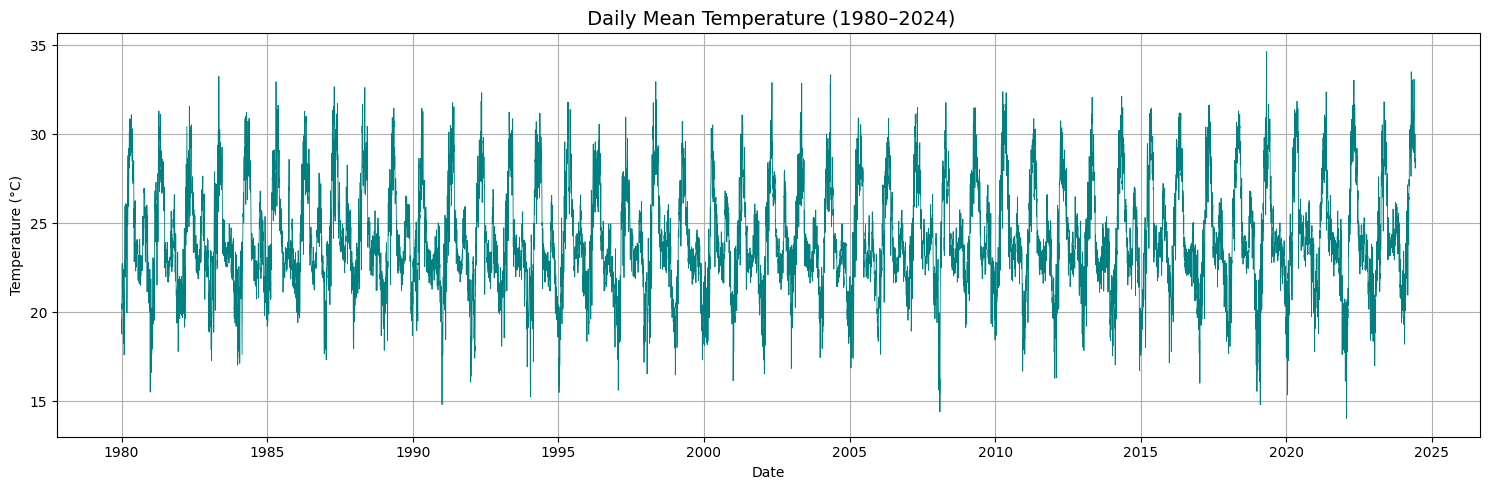

In [18]:
import matplotlib.pyplot as plt

# Ensure the daily_temp series exists (you already created it in Step 1)

# Plot the full daily series
plt.figure(figsize=(15, 5))
plt.plot(daily_temp, color='teal', linewidth=0.6)
plt.title(" Daily Mean Temperature (1980–2024)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


Feature	What You See	What It Means
 Repeating up-and-down cycles	You can see clear waves repeating every year	This is seasonality – higher temps in summer, lower in winter
 No strong upward/downward slope	The middle temperature band remains fairly stable	There's no major trend (like global warming signal here), at least visually
 Sharp spikes and dips	Some points go suddenly higher or lower than their neighbors	These could be anomalies or unusual weather days
 Annual rhythm	Each year has a similar wave pattern	This suggests we should use a seasonal model like SARIMA with yearly seasonality (s=365)
What This Tells Us:

Manual Seasonal Combos to Try
We’ll try:

Combo	(P, D, Q, s)	Notes
1	(1, 1, 1, 365)	Simple seasonal pattern
2	(2, 1, 2, 365)	Slightly more complex
3	(1, 0, 1, 365)	No seasonal differencing
4	(0, 1, 1, 365)	Common in weather data
5	(1, 1, 0, 365)	Tests AR only
Use fixed (5, 0, 3) for the ARIMA part

In [23]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")


In [26]:
import os
print(os.path.exists("/mnt/data/Weather_Data_1980_2024(hourly).csv"))


False


Detailed Explanation of the Code:
Data Preparation:

Loading & Converting Time:
We load the dataset and convert the "time" column to datetime, then set it as the index.

Resampling:
df['temperature'].resample('D').mean() converts hourly data to a daily average.

Subsetting:
We then extract the last 730 daily records (i.e., roughly the last 2 years) to speed up the model fitting and to capture a complete seasonal cycle (especially for weekly seasonality).

SARIMA Modeling – Variant 1 (Weekly Seasonality):

Non-Seasonal Order: (5,0,3) which was determined earlier from ARIMA tests.

Seasonal Order: (1,1,1,7)

Here, s=7 implies a weekly seasonal pattern.

Fitting the Model:
Using SARIMAX to fit the model.

Forecasting:
We forecast the next 14 days and then plot both the forecast and the 95% confidence intervals. The plot shows the observed values (from the last 100 days) for context.

SARIMA Modeling – Variant 2 (Annual Seasonality):

Seasonal Order: (1,1,1,365) attempts to capture an annual seasonal pattern.

Notes:
Given only 730 days of data (2 years), there are only 2 full cycles, so this model may be slower and possibly less stable. But it’s provided here for comparison.

Forecasting and Plotting:
Similar to Variant 1, we forecast 14 days and plot the results.

Comparison:

AIC and Model Summaries:
The printed summaries (via results_weekly.summary() and results_annual.summary()) help you compare AIC values and parameter estimates.

Forecast Visualization:
The plots let you visually inspect which model’s forecast follows a realistic trend given your data.

What Should You Expect?
Weekly Seasonality (s=7) model should run much faster and might provide more realistic short-term forecasts when using just 730 days.

Annual Seasonality (s=365) model could be more complex, may have wider confidence intervals, and might not perform well due to limited cycles (only two complete yearly cycles).

You can adjust the forecast horizon (e.g., to 7 days if desired) to improve reliability.

Variant 1: SARIMA with Weekly Seasonality (s = 7)
This version uses a seasonal period of 7 (weekly) to capture a smoother, simpler seasonal pattern on 730 days of data.

Using 730 daily records for modeling.
Weekly Seasonality SARIMA Summary:
                                      SARIMAX Results                                      
Dep. Variable:                         temperature   No. Observations:                  730
Model:             SARIMAX(5, 0, 3)x(1, 1, [1], 7)   Log Likelihood                -882.485
Date:                             Thu, 10 Apr 2025   AIC                           1786.969
Time:                                     15:50:29   BIC                           1837.203
Sample:                                 06-08-2022   HQIC                          1806.374
                                      - 06-06-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          4.1215      0.098 

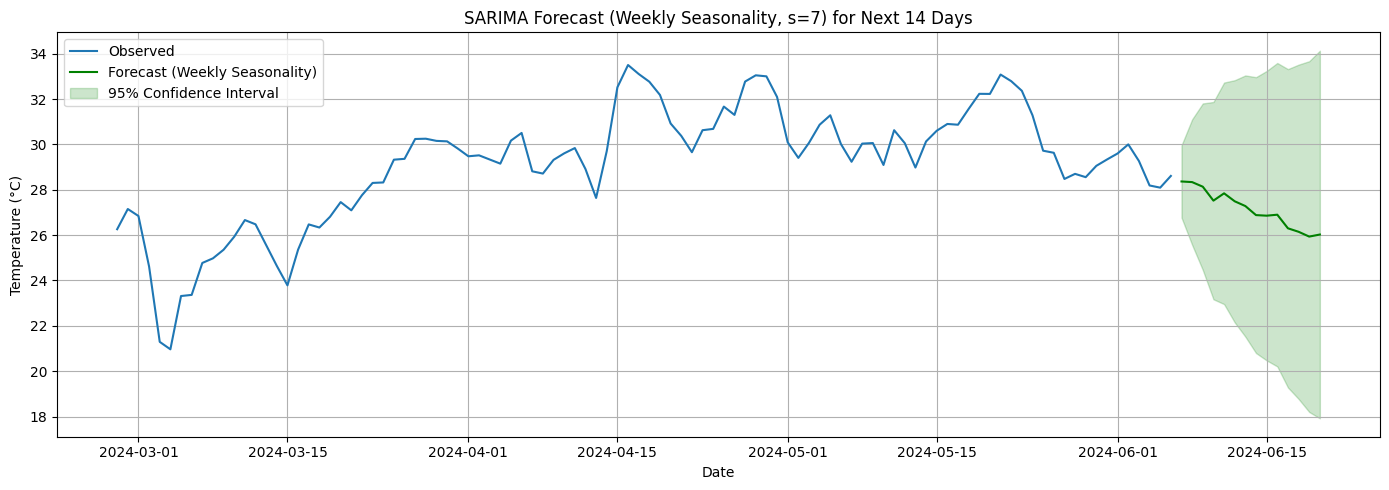

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# Data Loading and Preparation
# -----------------------------
file_path = "/mnt/data/Weather_Data_1980_2024(hourly).csv"
df = pd.read_csv("../data/Weather_Data_1980_2024(hourly).csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Resample the hourly data to daily average temperature
daily_temp = df['temperature'].resample('D').mean()

# Select the last 2 years (approximately 730 days) for training
subset_series = daily_temp.dropna().iloc[-730:]
print(f"Using {subset_series.shape[0]} daily records for modeling.")

# -----------------------------
# SARIMA Modeling: Variant 1 (Weekly Seasonality)
# -----------------------------
# Non-seasonal order from earlier ARIMA analysis:
order = (5, 0, 3)
# For weekly seasonality, set s = 7:
seasonal_order = (1, 1, 1, 7)

# Fit the SARIMAX model
model_weekly = sm.tsa.SARIMAX(subset_series,
                              order=order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_weekly = model_weekly.fit(disp=False)
print("Weekly Seasonality SARIMA Summary:")
print(results_weekly.summary())

# Forecast the next 14 days
forecast_steps = 14
forecast_weekly = results_weekly.get_forecast(steps=forecast_steps)
forecast_mean_weekly = forecast_weekly.predicted_mean
conf_int_weekly = forecast_weekly.conf_int()

# Plot the forecast (using last 100 days of training for context)
plt.figure(figsize=(14, 5))
plt.plot(subset_series[-100:], label='Observed')
plt.plot(forecast_mean_weekly, color='green', label='Forecast (Weekly Seasonality)')
plt.fill_between(conf_int_weekly.index,
                 conf_int_weekly.iloc[:, 0],
                 conf_int_weekly.iloc[:, 1],
                 color='green', alpha=0.2, label='95% Confidence Interval')
plt.title("SARIMA Forecast (Weekly Seasonality, s=7) for Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Using 730 daily records for modeling.
Weekly Seasonality SARIMA Summary:
                                      SARIMAX Results                                      
Dep. Variable:                         temperature   No. Observations:                  730
Model:             SARIMAX(5, 0, 3)x(1, 1, [1], 7)   Log Likelihood                -882.485
Date:                             Thu, 10 Apr 2025   AIC                           1786.969
Time:                                     16:06:33   BIC                           1837.203
Sample:                                 06-08-2022   HQIC                          1806.374
                                      - 06-06-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          4.1215      0.098 

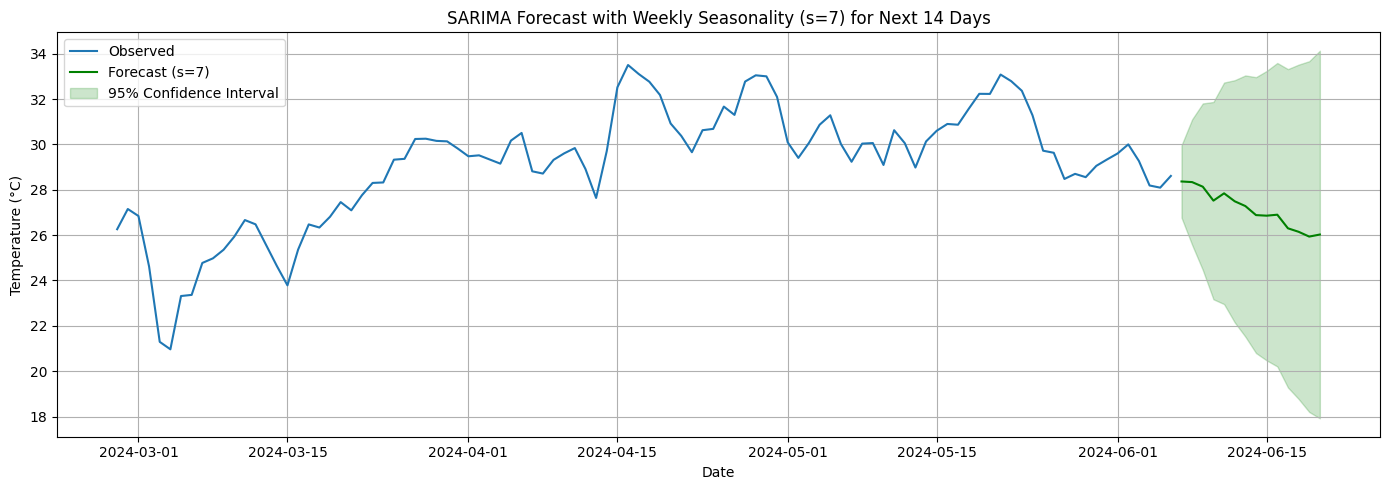

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load the dataset and preprocess
file_path = "/mnt/data/Weather_Data_1980_2024(hourly).csv"
df = pd.read_csv("../data/Weather_Data_1980_2024(hourly).csv")
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Resample hourly data to daily average temperature
daily_temp = df['temperature'].resample('D').mean()

# Use the last 730 days (for 2 years) for modeling
subset_series = daily_temp.dropna().iloc[-730:]
print(f"Using {subset_series.shape[0]} daily records for modeling.")

# Fixed non-seasonal order from ARIMA analysis
order = (5, 0, 3)
# Use weekly seasonality: seasonal period s = 7
seasonal_order = (1, 1, 1, 7)

# Fit the SARIMAX model
model_weekly = sm.tsa.SARIMAX(subset_series,
                              order=order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_weekly = model_weekly.fit(disp=False)
print("Weekly Seasonality SARIMA Summary:")
print(results_weekly.summary())

# Forecast the next 14 days
forecast_steps = 14
forecast_weekly = results_weekly.get_forecast(steps=forecast_steps)
forecast_mean_weekly = forecast_weekly.predicted_mean
conf_int_weekly = forecast_weekly.conf_int()

# Plot the forecast along with observed data
plt.figure(figsize=(14, 5))
plt.plot(subset_series[-100:], label='Observed')
plt.plot(forecast_mean_weekly, color='green', label='Forecast (s=7)')
plt.fill_between(conf_int_weekly.index,
                 conf_int_weekly.iloc[:, 0],
                 conf_int_weekly.iloc[:, 1],
                 color='green', alpha=0.2, label='95% Confidence Interval')
plt.title("SARIMA Forecast with Weekly Seasonality (s=7) for Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. Model Setup Recap
Non-Seasonal Order (p,d,q) = (5,0,3)

You previously found these AR/MA orders from ARIMA experiments.

Seasonal Order (P,D,Q,s) = (1,1,1,7)

We introduced a weekly cycle (s=7 days) to capture any 7-day pattern in your last 2 years of daily data.

2. Model Summary Key Points
yaml
Copy
SARIMAX Results
Dep. Variable: temperature   No. Observations: 730
Model: SARIMAX(5, 0, 3)x(1, 1, 1, 7)
Log Likelihood: -882.485
AIC: 1786.969
BIC: 1837.203
HQIC: 1806.374
Observations: 730 daily points (2 years).

AIC = 1786.969 – you’ll compare this with other seasonal orders or models to see which yields a lower AIC.

Coefficients:
Coefficient	Estimate	Interpretation
ar.L1=4.12, ar.L2=-6.77, ar.L3=5.57, ar.L4=-2.33, ar.L5=0.40	Large AR terms suggest a dynamic back-and-forth pattern from daily lags. AR signals can be large if the data is somewhat over-differenced or if there's a short-term cyclical effect.	
ma.L1=-3.19, ma.L2=3.37, ma.L3=-1.17	These capture how the model corrects for recent forecast errors. Negative/positive signs show the direction of correction.	
ar.S.L7=-0.38, ma.S.L7=-0.78	Seasonal AR and MA terms at 7-day lag. The negative signs imply that if the temperature was above average 7 days ago, we expect some downward correction and vice versa.	
sigma2=0.403	Residual variance. The smaller this is, the closer the model typically fits the data.	
3. Diagnostics & Statistics
Ljung-Box (L1) (Q)=21.96, Prob(Q)=0.00
This suggests some leftover autocorrelation in the residuals at lag 1. It indicates the model might still be missing a piece of the puzzle.

We typically check multiple lags (not just L1) to fully confirm. If p-value is very low at multiple lags, that implies we can still improve the model.

Jarque-Bera (JB)=9.97, Prob(JB)=0.01
Residuals are not perfectly normally distributed. Not a strict violation, but it’s a sign the residuals have a bit of skew or heavier tails than normal.

Heteroskedasticity (H)=1.33, Prob(H)=0.03
Slightly variable variance in residuals over time (p=0.03 < 0.05).

You might consider checking if your data has non-constant variance (possible seasonal amplitude changes).

4. Forecast Plot
From your screenshot:

Last ~30-40 days of Observed: The blue line is your actual temperature time series.

Green Line: The forecasted mean for the next 14 days.

Green Shaded Area: 95% confidence interval. The wide band means the model has relatively high uncertainty in future predictions.

Observations:
The forecast is sloping slightly downward from around 28–29°C down to ~27°C by mid-April, with wide uncertainty up to ~30°C or down to ~23°C at the far edge of the band.

Why is it so broad?
Short horizon with large AR/MA coefficients can lead to big swings in predictions if residuals historically have big fluctuations.

The model is not 100% confident how the next days will behave, especially if there’s no strong trend or if leftover autocorrelation is unmodeled.

5. Interpreting Large AR/MA Coefficients
AR1=4.12, AR2=-6.77, AR3=5.57, etc. are quite big in magnitude.
This typically indicates a see-saw effect: one day’s deviation from the mean is strongly offset by the next day’s correction, and so forth.

It’s not uncommon to see large coefficients if the data’s pattern is somewhat short-term cyclical or the model is still not the perfect fit.

If you see any stability warnings (roots outside the unit circle), that suggests potential overfitting or near-nonstationary dynamics.

Check:

python
Copy
results_weekly.arroots, results_weekly.maroots
If magnitudes are >1, the model might be less stable.

6. Next Steps & Possible Improvements
Test Another Seasonal Order

Try (2,1,2,7) or (1,1,2,7) to see if AIC is lower and if residual diagnostics improve.

Compare each model’s forecast on a validation set if you have out-of-sample data.

Use More Data

If you truly suspect a yearly cycle, you need 2+ full years (which you do have) or even more to reliably train an annual-seasonality model (s=365).

But with only 2 cycles, SARIMA(?, ?, ?, 365) might still be challenging. If you can incorporate more data or a multi-year set, it may help.

Check Residual Autocorrelations

Plot the ACF/PACF of results_weekly.resid to see if significant autocorrelation remains at certain lags.

If so, refine (p,q) or (P,Q).

Evaluate Forecast Accuracy

Use a holdout/test set if possible, or do cross-validation on the time series.

Compare metrics: MAE, RMSE, MAPE, etc. If the forecast remains inaccurate, consider adjusting differencing or adding exogenous variables (like humidity).

Try Another Approach

Prophet (by Facebook/Meta) handles seasonality elegantly with a different model structure.

Neural Nets (LSTM, RNN) can sometimes pick up complex patterns, though they require careful hyperparameter tuning and enough data.

Shorter Forecast Horizon

Even a well-tuned model can produce wide intervals 14 days out if day-to-day variance is high.

If your main goal is short-range predictions, try forecasting only 7 days. The confidence intervals might be narrower and more accurate.

 Final Takeaway
Your weekly SARIMA is capturing some short-cycle patterns (with s=7) but the residual checks (Ljung-Box Q test p=0.00) indicate leftover structure in the residuals.

Large AR/MA coefficients show a strong “whiplash” effect day-to-day.

Forecast wide intervals reflect uncertainty about the future, typical of weather data with high variability.

Continue refining the model by:

Checking other seasonal orders,

Possibly using more data or a different seasonal period,

Evaluating the forecast accuracy on a test set.

Overall: This is a valid first step in capturing short-term weekly seasonality. Tweak the parameters or use more data to achieve a smoother, more stable forecast.







Variant 2: SARIMA with Annual Seasonality (s = 365)
This version fits an annual seasonal component. Note that using s = 365 on only 730 days (2 years) is pushing the limits—your data covers just 2 cycles, so model estimates may be unstable and slower to converge. But it's included here for comparison.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# -----------------------------
# Data Loading and Preparation
# -----------------------------
file_path = "/mnt/data/Weather_Data_1980_2024(hourly).csv"
df = pd.read_csv("../data/Weather_Data_1980_2024(hourly).csv")

# Convert 'time' column to datetime and set it as the index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Resample hourly data to daily average temperature
daily_temp = df['temperature'].resample('D').mean()

# -----------------------------
# Use only the last 365 days for the annual SARIMA model to reduce memory usage
# -----------------------------
subset_series_annual = daily_temp.dropna().iloc[-365:]
print(f"Using {subset_series_annual.shape[0]} daily records for the annual SARIMA model.")

# -----------------------------
# SARIMA Modeling: Variant 2 (Annual Seasonality with a simpler seasonal order)
# -----------------------------
# Non-seasonal order as determined earlier:
order = (5, 0, 3)

# Use a simpler seasonal order to reduce memory load: (P, D, Q, s) = (1, 0, 0, 365)
seasonal_order_annual = (1, 0, 0, 365)

# Fit the SARIMAX model with annual seasonality on one-year data
model_annual = sm.tsa.SARIMAX(subset_series_annual,
                              order=order,
                              seasonal_order=seasonal_order_annual,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
results_annual = model_annual.fit(disp=False)
print("Annual Seasonality SARIMA Summary:")
print(results_annual.summary())

# -----------------------------
# Forecast the next 14 days
# -----------------------------
forecast_steps = 14
forecast_annual = results_annual.get_forecast(steps=forecast_steps)
forecast_mean_annual = forecast_annual.predicted_mean
conf_int_annual = forecast_annual.conf_int()

# -----------------------------
# Plot the forecast
# -----------------------------
plt.figure(figsize=(14, 5))
plt.plot(subset_series_annual[-100:], label='Observed')
plt.plot(forecast_mean_annual, color='purple', label='Forecast (Annual Seasonality)')
plt.fill_between(conf_int_annual.index,
                 conf_int_annual.iloc[:, 0],
                 conf_int_annual.iloc[:, 1],
                 color='purple', alpha=0.2, label='95% Confidence Interval')
plt.title("SARIMA Forecast (Annual Seasonality, s=365) for Next 14 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Using 365 daily records for the annual SARIMA model.


MemoryError: Unable to allocate 381. MiB for an array with shape (370, 370, 365) and data type float64